Referece : https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic by Masum Rumi

Kernel Goals
- **Do a statistical analysis** of how some group of people was survived more than others.
- **Do an exploratory data analysis(EDA)** of titanic with visualizations and storytelling.
- **Predict** : Use machine learning classification models to predict the chances of passengers survival

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("data/titanic"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [3]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [4]:
%%time
train.sample(5)

Wall time: 11.5 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.00,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.00,B96 B98,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.70,C47,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.50,C106,S
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S


In [5]:
%timeit test.sample(5)

635 µs ± 32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
print("The shape of the train data is (row, column) : " + str(train.shape))
print(train.info())
print("The shape of the test data is (row, column) : " + str(test.shape))
print(test.info())

The shape of the train data is (row, column) : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
The shape of the test data is (row, column) : (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'>
<noscript>
<a href='#'>
<img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' />
</a>
</noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Titanic_data_mining&#47;Dashboard1' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='filter' value='publish=yes' />
</object>
</div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1516349898238');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px'; 
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [11]:
passengerid = test.PassengerId

print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [12]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum(). sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [13]:
%timeit -r2 -n10 missing_percentage(train)

11.9 ms ± 2.01 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [14]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [15]:
%%timeit -r2 -n10
missing_percentage(test)

8.06 ms ± 1.41 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [16]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [19]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna = False, normalize = True) * 100, 2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna = False))
    ## concating percent and total dataframe
    
    total.columns = ["Total"]
    percent.columns = ["Percent"]
    return pd.concat([total, percent], axis = 1)

In [20]:
percent_value_counts(train, "Embarked")

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [21]:
percent_value_counts(test, "Embarked")

,Total,Percent
S,270,64.59
C,102,24.40
Q,46,11.00


In [22]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Text(0.5, 1.0, 'Test Set')

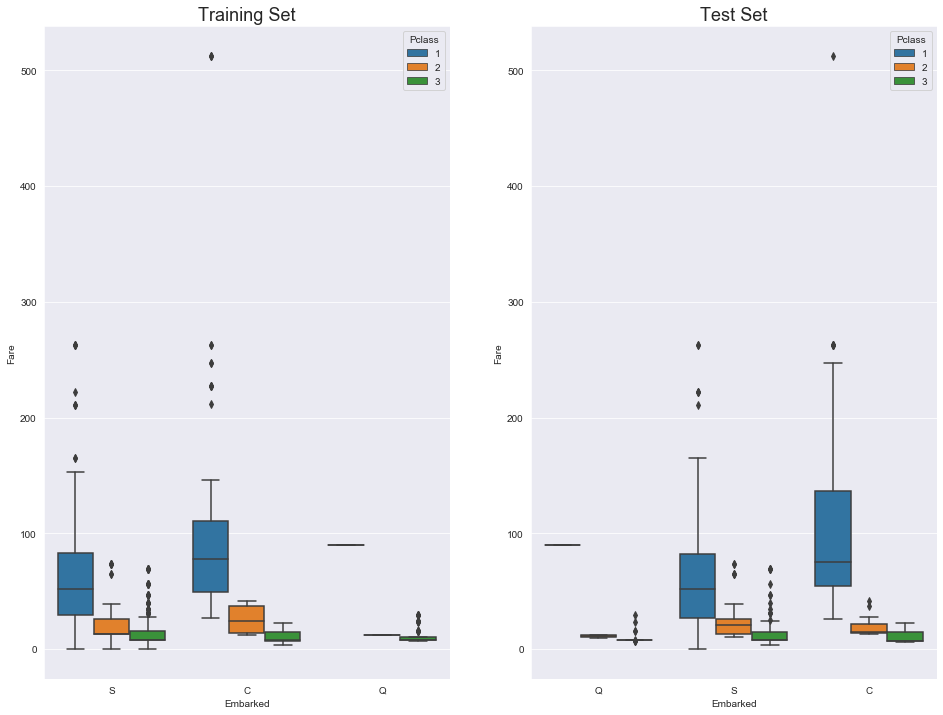

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (16, 12), ncols = 2)
ax1 = sns.boxplot(x = "Embarked", y = "Fare", hue = "Pclass", data = train, ax = ax[0]);
ax2 = sns.boxplot(x = "Embarked", y = "Fare", hue = "Pclass", data = test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title("Test Set", fontsize = 18)

In [28]:
 train["Embarked"]= train.Embarked.fillna("C")

In [29]:
print("Train Cabin missing : " + str(train.Cabin.isnull().sum() / len(train.Cabin)))
print("Test Cabin missing : " + str(test.Cabin.isnull().sum() / len(test.Cabin)))

Train Cabin missing : 0.7710437710437711
Test Cabin missing : 0.7822966507177034


In [30]:
survivers = train.Survived

train.drop(["Survived"], axis = 1, inplace = True)

all_data = pd.concat([train, test], ignore_index = False)

all_data.Cabin.fillna("N", inplace = True)

In [31]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [33]:
[i[0] for i in all_data.Cabin]

['N',
 'C',
 'N',
 'C',
 'N',
 'N',
 'E',
 'N',
 'N',
 'N',
 'G',
 'C',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'D',
 'N',
 'A',
 'N',
 'N',
 'N',
 'C',
 'N',
 'N',
 'N',
 'B',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'D',
 'N',
 'B',
 'C',
 'N',
 'N',
 'N',
 'N',
 'N',
 'B',
 'C',
 'N',
 'N',
 'N',
 'F',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'F',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'C',
 'N',
 'N',
 'N',
 'E',
 'N',
 'N',
 'N',
 'A',
 'D',
 'N',
 'N',
 'N',
 'N',
 'D',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'C',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'B',
 'N',
 'N',
 'N',
 'N',
 'E',
 'D',
 'N',
 'N',
 'N',
 'F',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'D',
 'C',
 'N',
 'B',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'F',
 'N',
 'N',
 'C',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'E'

In [34]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [35]:
all_data.groupby("Cabin")["Fare"].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [36]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i < 16:
        a = "G"
    elif i >= 16 and i < 27:
        a = "F"
    elif i >= 27 and i < 38:
        a = "T"
    elif i >= 38 and i < 47:
        a = "A"
    elif i >= 47 and i < 53:
        a = "E"
    elif i >= 53 and i < 54:
        a = "D"
    elif i >= 54 and i < 116:
        a = "C"
    else:
        a = "B"
    return a

In [37]:
with_N = all_data[all_data.Cabin == "N"]
without_N = all_data[all_data.Cabin != "N"]

In [38]:
## applying cabin estimator function.
with_N["Cabin"] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train.
all_data = pd.concat([with_N, without_N], axis = 0)

## PassengerId helps us separate train and test.
all_data.sort_values(by = "PassengerId", inplace = True)

## Separating train and test from all_data.
train = all_data[:891]
test = all_data[891:]

# adding saved target variable with train.
train["Survived"] = survivers

In [39]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [40]:
missing_value = test[(test.Pclass == 3) &
                    (test.Embarked == "S") &
                    (test.Sex == "male")].Fare.mean()

## replace the test.fare null values with test.fare mean
test["Fare"] = test.Fare.fillna(missing_value)

In [41]:
print("Train age missing value: " + str((train.Age.isnull().sum() / len(train)) * 100) + str("%"))
print("Test age missing value: " + str((test.Age.isnull().sum() / len(test)) * 100) + str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


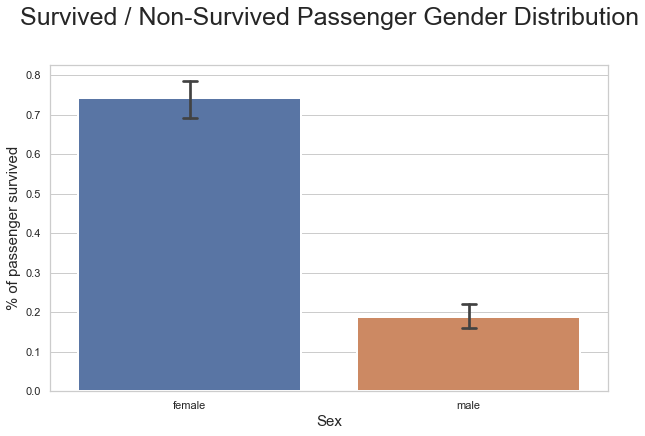

In [57]:
import seaborn as sns
# pal = {'male' : "green", 'female' : "Pink"}
sns.set(style = "whitegrid")
plt.subplots(figsize = (10, 6))
ax = sns.barplot(x = "Sex",
                y = "Survived",
                data = train,
#                 palette = pal,
                linewidth = 2,
                order = ['female', 'male'],
                capsize = .05,
                
                )

plt.title("Survived / Non-Survived Passenger Gender Distribution", fontsize = 25, loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex", fontsize = 15);

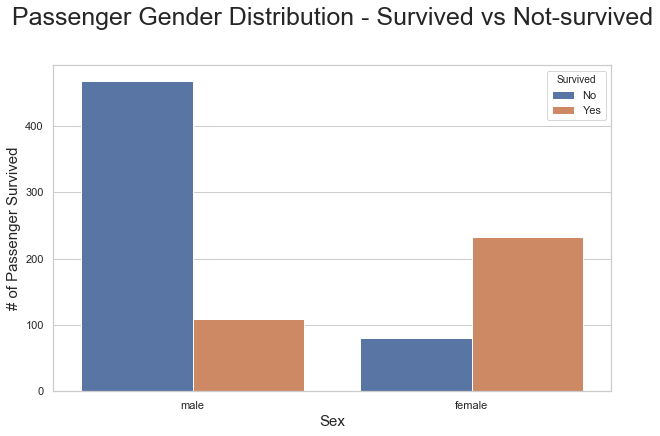

In [60]:
# pal = {1:"seagreen", 0:"gray"}
sns.set(style = "whitegrid")
plt.subplots(figsize = (10, 6))
ax = sns.countplot(x = "Sex",
                  hue = "Survived",
                  data = train,
           #       palette = pal
                  )

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad = 40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
# labels = ['Female', 'Male']
# plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

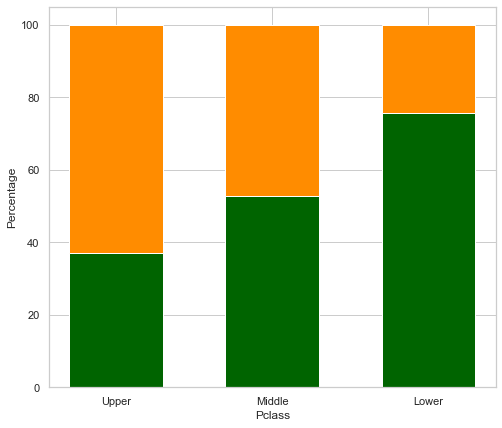

In [76]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass', columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0, 1, 2]
totals = [i + j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i, j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i, j in zip(temp_df['Yes'], totals)]

## Plotting
plt.subplots(figsize = (8, 7))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')

# Create green Bars
plt.bar(r, No_s, color = 'DarkGreen', edgecolor = 'white', width = barWidth)

# Create orange Bars
plt.bar(r, Yes_s, bottom = No_s, color = 'DarkOrange', edgecolor = 'white', width = barWidth)


# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')

# Show graphic
plt.show()

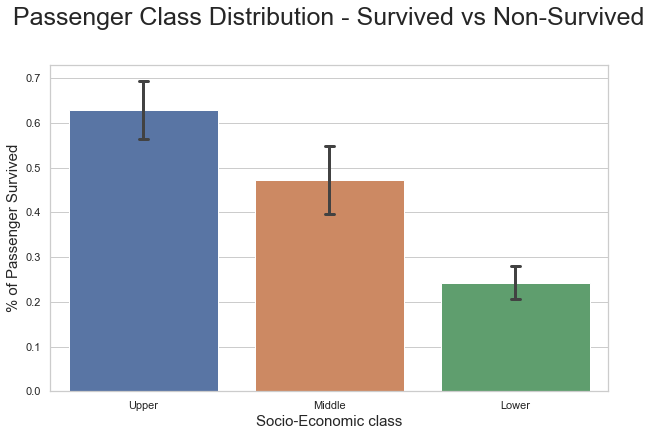

In [82]:
plt.subplots(figsize = (10, 6))
sns.barplot(x = "Pclass",
           y = "Survived",
           data = train,
           #linewidth = 6,
           capsize = .05,
           #errcolor = 'blue',
           errwidth = 3
           )

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad = 40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']

# val = sorted(train.Pclass.unique())
val = [0, 1, 2] ## this is just a temporary trick to get the label right.
plt.xticks(val, names);

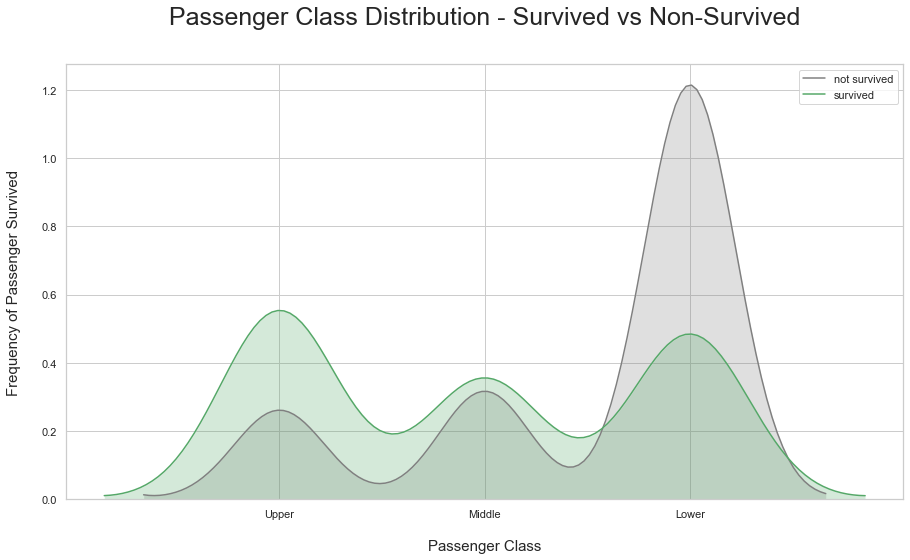

In [86]:
# Kernel Density Plot
fig = plt.figure(figsize = (15, 8))

ax = sns.kdeplot(train.Pclass[train.Survived == 0],
                color = 'gray',
                shade = True,
                label = 'not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'],
                color = 'g',
                shade = True,
                label = 'survived')

plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15, labelpad = 20)

## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

Text(0.5, 0, 'Fare')

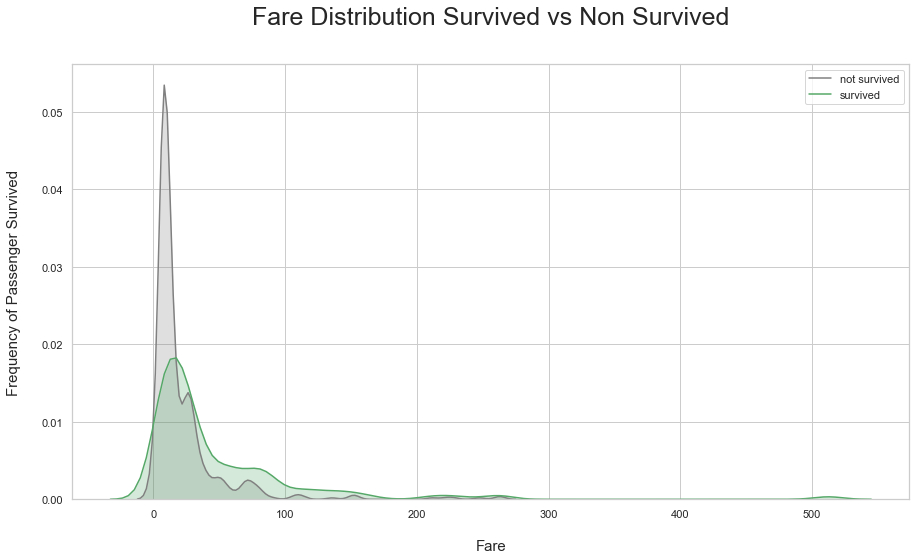

In [87]:
# Kernel Densitiy Plot
fig = plt.figure(figsize = (15, 8))
ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Fare'], color = 'gray', shade = True,
                label = 'not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Fare'], color = 'g', 
                 shade = True, label = 'survived')

plt.title("Fare Distribution Survived vs Non Survived", fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20)

In [88]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


Text(0, 0.5, 'Frequency')

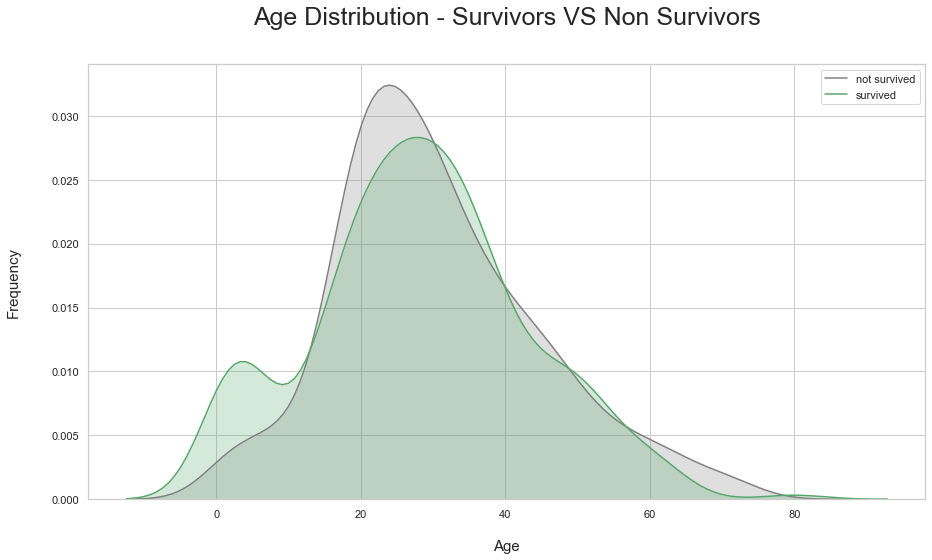

In [92]:
# Kernel Density Plot
fig = plt.figure(figsize = (15, 8))
ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'], color = 'gray', 
                 shade = True, label = 'not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'], color = 'g',
                shade = True, label = 'survived')

plt.title('Age Distribution - Survivors VS Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel("Frequency", fontsize = 15, labelpad = 30)

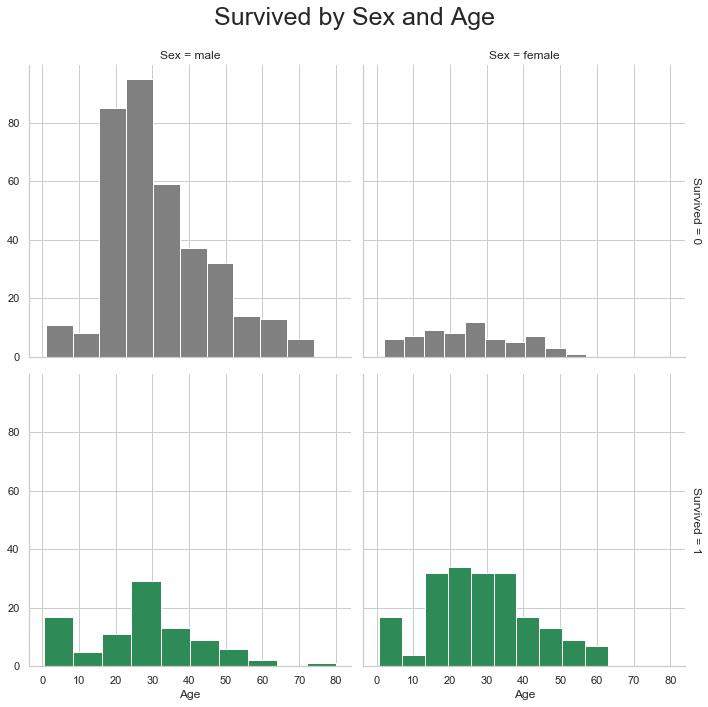

In [96]:
pal = {1: "seagreen", 0: "gray"}
g = sns.FacetGrid(train, size = 5,
                 col = "Sex", row = "Survived",
                 margin_titles = True, hue = "Survived", palette = pal)

g = g.map(plt.hist, "Age", edgecolor = "white");
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top = 0.90)

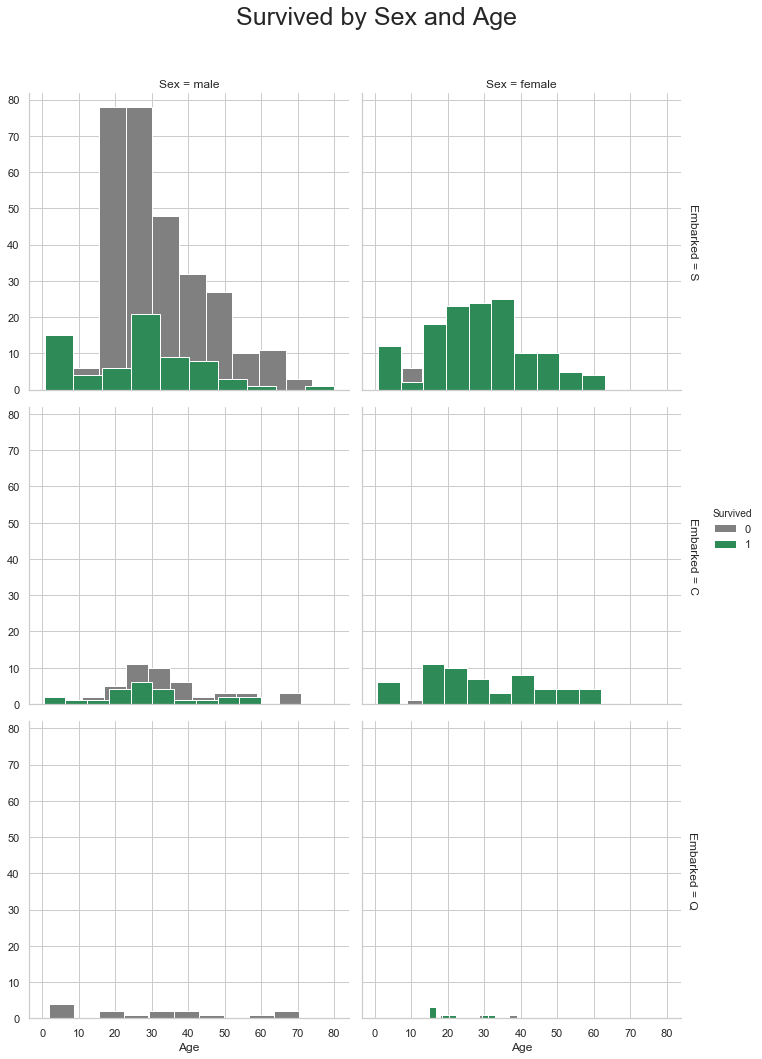

In [97]:
g = sns.FacetGrid(train, size = 5, col = "Sex", row = "Embarked",
                 margin_titles = True, hue = "Survived", palette = pal)

g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend()
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top = 0.90)

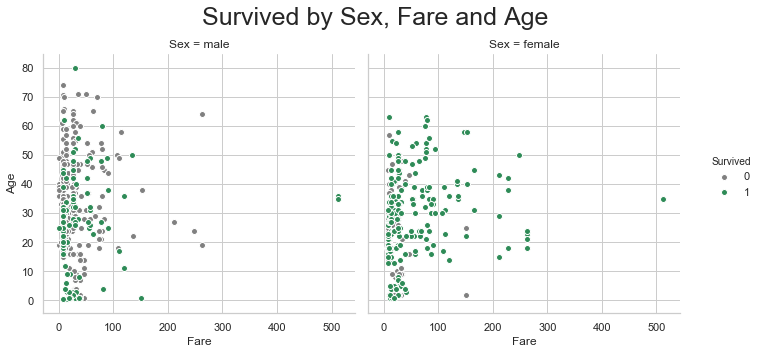

In [98]:
g = sns.FacetGrid(train, size = 5, hue = "Survived", col = "Sex",
                 margin_titles = True, palette = pal)

g.map(plt.scatter, "Fare", "Age", edgecolor = "w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top = 0.85)

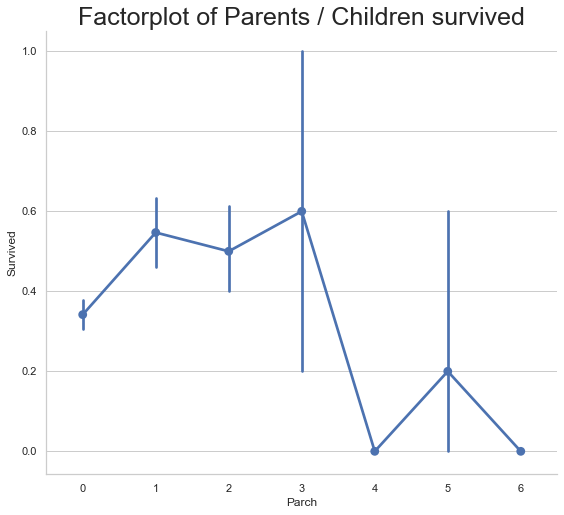

In [100]:
## dropping the three outliers where Fare is over $500
train = train[train.Fare < 500]

## factor plot
sns.factorplot(x = 'Parch', y = 'Survived', data = train,
              kind = "point", size = 8)
plt.title("Factorplot of Parents / Children survived", fontsize = 25)
plt.subplots_adjust(top = 0.85)

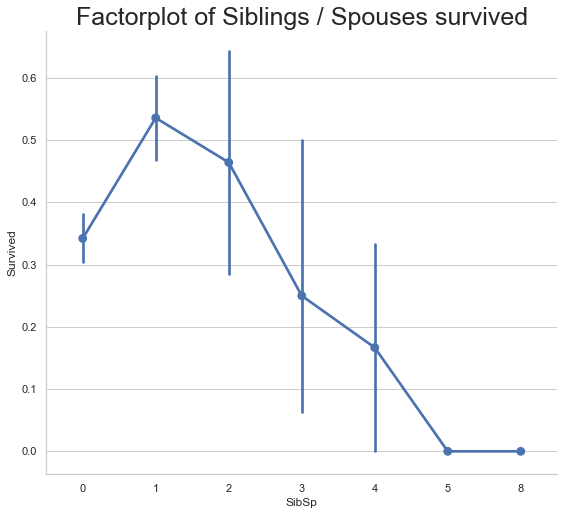

In [101]:
sns.factorplot(x = "SibSp", y = "Survived",
              data = train, kind = "point", size = 8)
plt.title('Factorplot of Siblings / Spouses survived', fontsize = 25)
plt.subplots_adjust(top = 0.85)

In [102]:
# Placing 0 for female and
# 1 for male in the "Sex" column.

train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)

In [103]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [107]:
train.describe(include = ['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Ford, Miss. Doolina Margaret ""Daisy""",CA. 2343,G,S
freq,1,7,464,644
